import librabries

In [1]:
import pandas as pd
import geopandas as gpd
import pyarrow
import numpy as np
import time
from h3 import h3
from multiprocessing import Pool
from multiprocessing import cpu_count
nCores = cpu_count()
import sys

import project functions

In [19]:
sys.path.append("..")
from src.geoIndexFunctions import *
from src.plotFunctions import *
from src.generalFunctions import *

### Get the boundary 

download GADM boundaries data from any country you want https://gadm.org/download_country_v3.html

In [9]:
COL_ID = 'GID_2'
COL_NAME = 'NAME_2'
COL_GEOM = 'geometry'

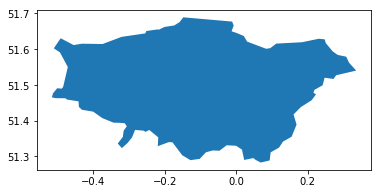

In [10]:
path = '/home/lefteris/Desktop/trajectories/data/GADM/gadm36_GBR_shp/gadm36_GBR_2.shp'
city = 'London'

gdf = get_city_from_gadm(city, path)

gdf.plot()

In [11]:
gdf.head()

,GID_2,NAME_2,geometry
0,GBR.1.36_1,Greater London,"POLYGON ((0.16627 51.39855576, 0.169167 51.388..."


In [12]:
# gdf.geometry[0].exterior.coords.xy

### Convert the boundary into a hexagon list and geohash list

hexagon

1st option

In [13]:
# select the hex size to work
APERTURE_SIZE = 9
hex_col = 'hex' + str(APERTURE_SIZE)

In [22]:
hex_list_col_df = get_hexagons_from_gdf(gdf, COL_GEOM, COL_ID, APERTURE_SIZE)
hex_list_col_df

,GID_2,hex_list,hex_list_length
0,GBR.1.36_1,"[89194e61267ffff, 89194ad054bffff, 89194ad1247...",17047


In [26]:
h3_list = flatten_col_list_value_from_df(hex_list_col_df, "hex_list")
len(h3_list)

17047

2nd option

In [27]:
gdf_hex_list = get_hexagons_fromJson(gdf.geometry[0].__geo_interface__,APERTURE_SIZE)

In [28]:
len(gdf_hex_list)

17047

In [20]:
# visualize_hexagons(gdf_hex_list).save('london_hex_8.html')
# visualize_polygon('green',hexagons=gdf_hex_list)

In [29]:
# create an empty dataframe with all the hex
all_hexagons_dict = {hex_col:gdf_hex_list}
all_hexagons_df = pd.DataFrame(all_hexagons_dict)

In [30]:
all_hexagons_df.head()

,hex9
0,89194e61267ffff
1,89194ad054bffff
2,89194ad1247ffff
3,89194e60147ffff
4,89194ad8887ffff


geohash

In [9]:
HASH_SIZE = 7 #geohash length
hash_col = 'hash' + str(HASH_SIZE)

In [11]:
from polygon_geohasher.polygon_geohasher import polygon_to_geohashes
from shapely import geometry

gdf_geohash_list = polygon_to_geohashes(gdf.geometry[0], HASH_SIZE, False)

In [12]:
# create an empty dataframe with all the hex
all_geohash_dict = {hash_col:gdf_geohash_list}
all_geohash_df = pd.DataFrame(gdf_geohash_list)
all_geohash_df.rename(columns={0:hash_col},inplace=True)

In [13]:
all_geohash_df.head()

,hash7
0,gcptmqf
1,u10he99
2,gcpvu7u
3,gcpvh25
4,gcpvvdw


### Save them to csv files 

In [35]:
# all_hexagons_df.to_csv('0 london_boundary_hex9_list.csv', index=False)

In [25]:
# all_geohash_df.to_csv('0 london_boundary_hash7_list.csv', index=False)

### We will work with H3 of aperture size 9 